In [1]:
import os
import sys
import gin
from IPython.core.display import clear_output, display
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ariadne.graph_net.graph_utils.graph_prepare_utils import to_pandas_graph_from_df, get_pd_line_graph, \
    apply_nodes_restrictions
from ariadne.transformations import Compose, ConstraintsNormalize, ToCylindrical


import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from prepare import parse

csv_params = {
"sep": '\s+',
"nrows": 15000,
"encoding": 'utf-8',
"names": ['event',  'x', 'y', 'z', 'station', 'track', 'px', 'py', 'pz', 'X0', 'Y0', 'Z0']
}
suff_df = ('_p', '_c')
gin.bind_parameter('get_pd_line_graph.restrictions_0',[-1000.18, 1000.18])
gin.bind_parameter('get_pd_line_graph.restrictions_1', [-1000.15, 1000.15])
gin.bind_parameter('get_pd_line_graph.suffix_c', '_c')
gin.bind_parameter('get_pd_line_graph.suffix_p','_p')
gin.bind_parameter('get_supernodes_df.suffix_c', '_c')
gin.bind_parameter('get_supernodes_df.suffix_p', '_p')
gin.bind_parameter('get_supernodes_df.axes', ['r', 'phi', 'z'])
gin.bind_parameter('apply_edge_restriction.edge_restriction', 100000.73)
stations_constraints = {
    0: {'x': [-166.6, 166.6], 'y': [-166.6, 166.6], 'z': [-423.5, 423.5]},
    1: {'x': [-166.6, 166.6], 'y': [-166.6, 166.6], 'z': [-423.5, 423.5]},
    2: {'x': [-166.6, 166.6], 'y': [-166.6, 166.6], 'z': [-423.5, 423.5]},
}


In [3]:
events = parse("/zfs/hybrilit.jinr.ru/user/p/pgonchar/data/bes3/events/1.txt", csv_params=csv_params, events_quantity='0..20000')
events = next(events)[0]
n_events = 20000
events_to_analyze = events[events.event < n_events]

In [4]:
import numpy as np

In [28]:
amounts={}
events_to_analyze = pd.DataFrame()
max_amount=5000
i = 0
for data_df, basename in parse("/zfs/hybrilit.jinr.ru/user/p/pgonchar/data/bes3/events/*.txt", 
                               csv_params=csv_params, events_quantity=':'):
    print('got %s %d' % (basename, i))
    i+=1
    data_df['mult'] = 0
    for ev_id, event in data_df.groupby('event'):
        data_df.loc[data_df.event == ev_id, 'mult'] = event.track[event.track != -1].nunique()
    for mult, multi in data_df.groupby('mult'):        

        uni_events = multi.event.unique()
        
        col = amounts[mult] if mult in amounts else 0
        elems_count = min(max_amount - col, len(uni_events))
        #elems_count = max_amount if max_amount <  else len(uni_events)
        
        if col < max_amount:
            amounts[mult] = col + elems_count
        else:
            continue
        to_select = uni_events[:elems_count]
        selected = multi[multi.event.isin(to_select)]

        if not events_to_analyze.empty:
            tricky = selected[selected.event.isin(events_to_analyze.event)]
            count_of_tricky = len(tricky)
            while count_of_tricky > 0:                
                for ev in tricky.event.unique():
                    selected.loc[selected.event.isin(events_to_analyze.event) & 
                                 (selected.event == ev), 'event'] = np.random.randint(1, 1e6, size=1)[0]
                tricky = selected[selected.event.isin(events_to_analyze.event)]
                count_of_tricky = len(tricky)

            events_to_analyze = events_to_analyze.append(selected, ignore_index=True)
        else:
            events_to_analyze = events_to_analyze.append(selected, ignore_index=True)

print(amounts)
for mult, multi in events_to_analyze.groupby('mult'): 
    print(mult, multi.event.nunique())

got 404.txt 0
got 372.txt 1
got 67.txt 2
got 190.txt 3
got 5.txt 4
got 256.txt 5
got 287.txt 6
got 520.txt 7
got 141.txt 8
got 478.txt 9
got 197.txt 10
got 60.txt 11
got 2.txt 12
got 251.txt 13
got 527.txt 14
got 280.txt 15
got 146.txt 16
got 309.txt 17
got 403.txt 18
got 375.txt 19
got 199.txt 20
got 529.txt 21
got 148.txt 22
got 471.txt 23
got 307.txt 24
got 12.txt 25
got 223.txt 26
got 584.txt 27
got 555.txt 28
got 134.txt 29
got 15.txt 30
got 583.txt 31
got 224.txt 32
got 552.txt 33
got 133.txt 34
got 69.txt 35
got 258.txt 36
got 289.txt 37
got 476.txt 38
got 300.txt 39
got 106.txt 40
got 567.txt 41
got 211.txt 42
got 20.txt 43
got 349.txt 44
got 398.txt 45
got 492.txt 46
got 335.txt 47
got 443.txt 48
got 332.txt 49
got 495.txt 50
got 444.txt 51
got 101.txt 52
got 560.txt 53
got 216.txt 54
got 27.txt 55
got 438.txt 56
got 84.txt 57
got 264.txt 58
got 218.txt 59
got 29.txt 60
got 340.txt 61
got 436.txt 62
got 391.txt 63
got 108.txt 64
got 569.txt 65
got 347.txt 66
got 396.txt 67
got

got 304.txt 525
got 220.txt 526
got 587.txt 527
got 11.txt 528
got 137.txt 529
got 556.txt 530
got 378.txt 531
got 89.txt 532
got 58.txt 533
got 269.txt 534
got 331.txt 535
got 496.txt 536
got 447.txt 537
got 563.txt 538
got 102.txt 539
got 24.txt 540
got 215.txt 541
got 564.txt 542
got 105.txt 543
got 23.txt 544
got 212.txt 545
got 518.txt 546
got 179.txt 547
got 491.txt 548
got 336.txt 549
got 440.txt 550
got 344.txt 551
got 395.txt 552
got 432.txt 553
got 516.txt 554
got 177.txt 555
got 80.txt 556
got 51.txt 557
got 260.txt 558
got 338.txt 559
got 511.txt 560
got 87.txt 561
got 170.txt 562
got 56.txt 563
got 267.txt 564
got 449.txt 565
got 343.txt 566
got 435.txt 567
got 392.txt 568
{2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 1327, 0: 402, 1: 937, 10: 349, 11: 70, 12: 8, 13: 3}
0 402
1 937
2 5000
3 5000
4 5000
5 5000
6 5000
7 5000
8 5000
9 1327
10 349
11 70
12 8
13 3


In [ ]:
events_to_analyze

In [4]:
import pandas as pd

In [67]:

segments = pd.DataFrame()

nodes = pd.DataFrame()
edges = pd.DataFrame()

for idx, event in events_to_analyze.groupby('event'):
    clear_output(wait=True)
    display("Event #%09d" % idx)

    transformer = Compose([
            ConstraintsNormalize(
                use_global_constraints=False,
                constraints=stations_constraints
            ),
            ToCylindrical(drop_old=True, cart_columns=('y', 'x'))
        ])
    try:
        event = transformer(event)
    except AssertionError as err:
        print("ASS error %r" % err)
        continue
    G = to_pandas_graph_from_df(event, suffixes=suff_df, compute_is_true_track=True)
    nodes_t, edges_t = get_pd_line_graph(G, apply_nodes_restrictions)
    nodes = nodes.append(nodes_t, sort=False)
    edges = edges.append(edges_t, sort=False)

'Event #000998952'

ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([0]); data keys: dict_keys([0, 1, 2])')


In [68]:
nodes

,dx,dy,z_p,z_c,y_p,y_c,dz,z,from_ind,to_ind,track,station
0,0.267107,0.115154,0.149154,0.387596,0.274153,0.389307,0.238442,0.333333,12189,12214,-1,0
1,0.267107,0.115154,0.149154,0.777477,0.274153,0.389307,0.628324,0.333333,12189,12215,-1,0
2,0.267107,0.621987,0.149154,0.435956,0.274153,0.896140,0.286803,0.333333,12189,12216,-1,0
3,0.267107,0.621987,0.149154,0.510199,0.274153,0.896140,0.361045,0.333333,12189,12217,-1,0
4,0.267107,0.621987,0.149154,0.806499,0.274153,0.896140,0.657346,0.333333,12189,12218,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.243097,-1.649110,-0.452152,-0.157319,2.068958,0.419847,0.294834,0.666667,66638,66627,-1,1
8124,0.243097,2.840512,-0.452152,0.376702,2.068958,-1.373715,0.828854,0.666667,66638,66630,-1,1
8125,0.243097,2.904525,-0.452152,0.167289,2.068958,-1.309703,0.619441,0.666667,66638,66633,-1,1
8126,0.243097,0.822906,-0.452152,-0.881248,2.068958,2.891863,-0.429095,0.666667,66638,66636,-1,1


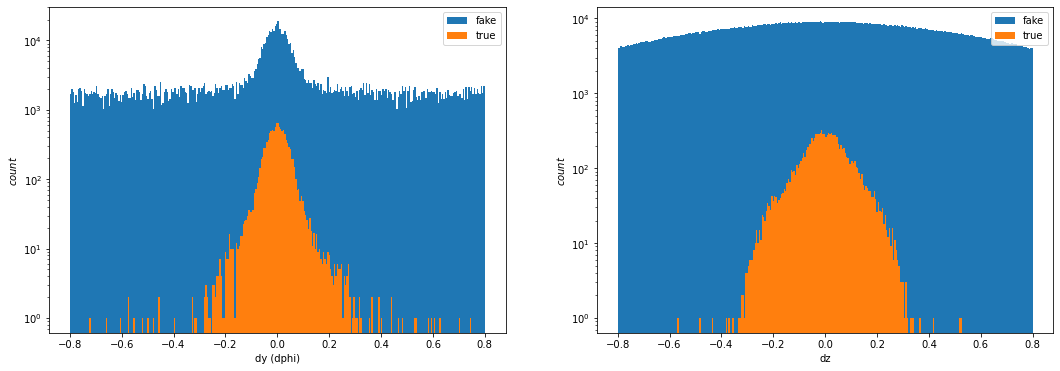

In [69]:
true_nodes = nodes[nodes.track != -1]
fake_nodes = nodes[nodes.track == -1]

plt.figure(figsize=(18,6))

plt.subplot(121)
binning=dict(bins=300, range=(-0.8, 0.8))
plt.hist(fake_nodes.dy, label='fake', log=True, **binning)
plt.hist(true_nodes.dy, label='true', **binning)
#plt.axvline(-0.15, color='yellow', linestyle='dashed', linewidth=3)
#plt.axvline(0.15, color='yellow', linestyle='dashed', linewidth=3)
plt.ylabel('$count$')
plt.xlabel('dy (dphi)')
plt.legend(loc=0)

plt.subplot(122)
binning=dict(bins=300, range=(-0.8, 0.8))
plt.hist(fake_nodes.dz, label='fake', log=True, **binning)
plt.hist(true_nodes.dz, label='true', **binning)
#plt.axvline(-0.15, color='yellow', linestyle='dashed', linewidth=3)
#plt.axvline(0.15, color='yellow', linestyle='dashed', linewidth=3)
plt.ylabel('$count$')
plt.xlabel('dz')
plt.legend(loc=0)

In [70]:
def calc_purity_reduce_factor(df_full, df_filtered, true_label = 'true_superedge', cmp_with=-1):
    assert true_label in df_full and true_label in df_filtered

    return len(df_filtered[df_filtered[true_label] != cmp_with]) / len(df_full[df_full[true_label] != cmp_with]), len(df_full) / len(df_filtered)

In [24]:
def filter_segments(df, dphi_min=-0.33, dphi_max=0.33, dz_min=-0.4, dz_max=0.4):
    return df[
        (df.dy > dphi_min) & (df.dy < dphi_max) &
        (df.dz > dz_min) & (df.dz < dz_max)
    ]


#dphi_minmax = (-0.33, 0.33)
#dz_minmax = (-0.4, 0.4)
#segments = nodes
#filtered = filter_segments(segments)#, *dphi_minmax, *dz_minmax)

#purity_, reduce_ = calc_purity_reduce_factor(segments, filtered, 'track', -1)
print("Initial fake to real ratio is %.6f" % (len(segments) / len(segments[segments.track != -1])))
print("Currently fake to real ratio is %.6f" % (len(filtered) / len(filtered[filtered.track != -1])))
print("Result purity %.3f; segments filtering reduced ratio in %.3f times" % (purity_, reduce_))

NameError: name 'segments' is not defined

In [25]:
def apply_edge_restriction(pd_edges_df, RESTRICTION=0.15):
    assert 'weight' in pd_edges_df
    return pd_edges_df[pd_edges_df.weight < RESTRICTION]


#filtered = apply_edge_restriction(edges, 0.123)

#purity_, reduce_ = calc_purity_reduce_factor(edges, filtered, 'true_superedge', -1)
print("Initial fake to real ratio is %.6f" % (len(edges) / len(edges[edges.true_superedge != -1])))
print("Currently fake to real ratio is %.6f" % (len(filtered) / len(filtered[filtered.true_superedge != -1])))
print("Result purity %.3f; segments filtering reduced ratio in %.3f times" % (purity_, reduce_))

NameError: name 'edges' is not defined

In [31]:
from ariadne.graph_net.graph_utils.graph_prepare_utils import construct_output_graph
from ariadne.graph_net.graph_utils.graph import save_graph
def apply_nodes_restrictions_t(df, a, b):
    return filter_segments(df)

out_dir = "../output/cgem_linegraph_note_5k_2/"
os.makedirs(out_dir, exist_ok=True)
s = 0
mumu={}
for mult, multi in events_to_analyze.groupby('mult'):
    if multi.event.nunique() < 900:
        print("skipping with mult %d" % mult)
        continue
    print("doing for events with mult %d. count of events= %d" % (mult, multi.event.nunique()))
    for idx, event in multi.groupby('event'):
        event = event[event.track >= -1]
        #clear_output(wait=True)
        #display("Event #%09d" % idx)
    
        transformer = Compose([
                ConstraintsNormalize(
                    use_global_constraints=False,
                    constraints=stations_constraints
                ),
                ToCylindrical(drop_old=True, cart_columns=('y', 'x'))
            ])
        try:
            event = transformer(event)
        except AssertionError as err:
            print("ASS error %r" % err)
            continue
        G = to_pandas_graph_from_df(event, suffixes=suff_df, compute_is_true_track=True)
        nodes_t, edges_t = get_pd_line_graph(G, apply_nodes_restrictions_t)
        if edges_t.empty:
            print("SKIPPED broken %d event" % idx)
            continue
    
        # here we are filtering out superedges, trying to leave true superedges as much as we can
        edges_filtered = apply_edge_restriction(edges_t, 0.123)
    
        # construct the output graph suitable for the neural network
        out = construct_output_graph(nodes_t, edges_filtered, ['y_p', 'y_c', 'z_p', 'z_c', 'z'],
                                     [np.pi, np.pi, 1., 1., 1.], 'edge_index_p', 'edge_index_c')
        save_graph(out, out_dir+"/graph_%d_m%d" % (idx, event.mult.unique()[0]))
        s+=1
        c = mumu[mult] if mult in mumu else 0
        mumu[mult] = c+1
print("done total saved: %d" % s)
print("amount by mult: %r" % mumu)

skipping with mult 0
doing for events with mult 1. count of events= 937
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('So

ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([], dtype=int64); data keys: dict_keys([0, 1, 2])')
ASS error AssertionError('Some station keys in constraints are not presented in data. Keys: array([]